In [1]:
import os
import gzip
import re
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [2]:
sns.set(palette='colorblind', font_scale=1.3)
palette = sns.color_palette()

## E.coli K-12 tRNA adaptation index (tAI)

In [3]:
path = os.path.join(os.getcwd(), 'data/raw_tai/Escherichia coli BCT str. K-12 substr..csv')
e_coli_tai = pd.read_csv(path, index_col='Gene')
e_coli_tai.head()

,Unnamed: 0,tAI
Gene,,
aaaD,1,0.214270
aaaE,2,0.221321
aaeA,3,0.226306
aaeB,4,0.208433
aaeR,5,0.212711


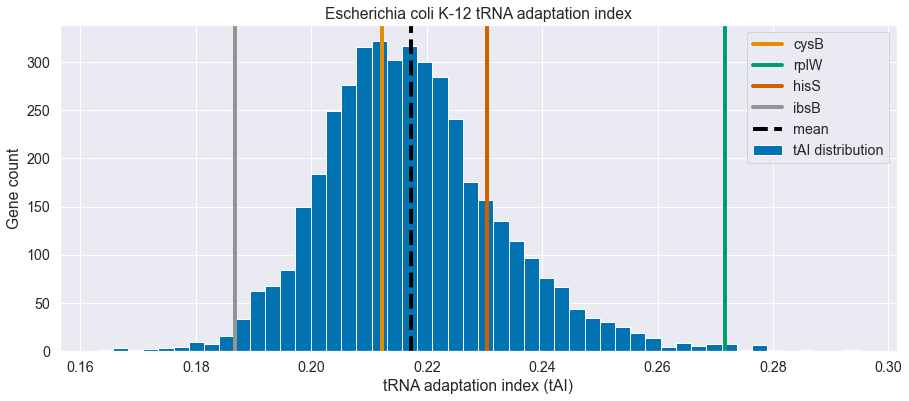

In [4]:
f, ax = plt.subplots(1, 1, figsize=(15, 6))

tai_values = e_coli_tai['tAI'].values
ax.hist(tai_values, bins=50, color=palette[0], label='tAI distribution');

ax.axvline(e_coli_tai.loc['cysB']['tAI'], color=palette[1], label='cysB', linewidth=4);
ax.axvline(e_coli_tai.loc['rplW']['tAI'], color=palette[2], label='rplW', linewidth=4);
ax.axvline(e_coli_tai.loc['hisS']['tAI'], color=palette[3], label='hisS', linewidth=4);
ax.axvline(e_coli_tai.loc['ibsB']['tAI'], color=palette[7], label='ibsB', linewidth=4);

mean = np.mean(tai_values)
ax.axvline(mean, color='black', label='mean', linewidth=4, linestyle='--');

ax.legend();
ax.set_title('Escherichia coli K-12 tRNA adaptation index');
ax.set_xlabel('tRNA adaptation index (tAI)');
ax.set_ylabel('Gene count');

## Protein ID to gene

In [56]:
def make_map_protein_id_to_gene(assembly):
    protein_id_to_gene = {}
    gene_to_protein_id = {}
    
    match_re_1 = r'.*gene=([^;]+).*protein_id=([^;]+).*$'
    match_re_2 = r'.*protein_id=([^;]+).*gene=([^;]+).*$'

    path = os.path.join(os.getcwd(), f'data/sequences/{assembly}/{assembly}_genomic.gff.gz')
    with gzip.open(path) as f:
        for line in f:
            l = str(line)

            m1 = re.match(match_re_1, l)
            if m1 is not None:
                protein_id_to_gene[m1[2]] = m1[1]
                gene_to_protein_id[m1[1]] = m1[2]
                continue

            m2 = re.match(match_re_2, l)
            if m2 is not None:
                protein_id_to_gene[m2[1]] = m2[2]
                gene_to_protein_id[m2[2]] = m2[1]
                continue
                
    return protein_id_to_gene, gene_to_protein_id

In [57]:
e_coli_assembly = 'GCA_000800765.1'
protein_id_to_gene, gene_to_protein_id = make_map_protein_id_to_gene(e_coli_assembly)
len(protein_id_to_gene)

4034

In [59]:
gene_to_protein_id['cysB']

'AIZ51075.1'